# Exploratory Data Analysis of Chemicals in Cosmetics Dataset

# Introduction

This project analyzes a Chemicals in Cosmetics Dataset obtained from Data.gov, the official open data platform of the United States Government. The dataset provides detailed information about cosmetic and personal care products, including product names, brands, companies, primary and sub-categories, and the chemical ingredients used in these products.

The primary objective of this analysis is to explore the usage and distribution of chemicals across various cosmetic categories, such as makeup, hair care, and nail products. By performing data cleaning, preprocessing, and exploratory data analysis (EDA), this project aims to identify patterns related to chemical frequency, product categories, and brand-level trends.

Through descriptive statistics and visualizations, the analysis seeks to generate meaningful insights that can support consumer awareness, regulatory understanding, and industry-level evaluation of chemical usage in cosmetic products.

In [75]:
#Import Libraries
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date and time handling
from datetime import datetime


Load Dataset

In [76]:
df = pd.read_csv("cscpopendata.csv")



##  Total Number of Rows and Columns

To understand the size of the dataset, we use the .shape attribute.

In [77]:
df.shape


(114635, 22)

In [78]:
column_descriptions = {
    "CDPHId": "Unique identifier assigned to each cosmetic product record",
    "ProductName": "Name of the cosmetic or personal care product",
    "CSFId": "Identifier related to the chemical substance or formulation",
    "CSF": "Name or description of the chemical formulation",
    "CompanyId": "Unique identifier for the company",
    "CompanyName": "Name of the manufacturing or distributing company",
    "BrandName": "Brand under which the product is marketed",
    "PrimaryCategoryId": "Numeric identifier for the main product category",
    "PrimaryCategory": "Primary category of the cosmetic product",
    "SubCategoryId": "Numeric identifier for the product sub-category",
    "SubCategory": "Detailed classification of the product type",
    "CasId": "Identifier associated with the chemical substance",
    "CasNumber": "Chemical Abstracts Service (CAS) registry number",
    "ChemicalId": "Unique identifier assigned to each chemical",
    "ChemicalName": "Name of the chemical ingredient used",
    "InitialDateReported": "Date when the chemical was first reported",
    "MostRecentDateReported": "Most recent date the chemical usage was reported",
    "DiscontinuedDate": "Date when the chemical was discontinued, if applicable",
    "ChemicalCreatedAt": "Date when the chemical record was created",
    "ChemicalUpdatedAt": "Date when the chemical record was last updated",
    "ChemicalDateRemoved": "Date when the chemical was officially removed",
    "ChemicalCount": "Number of occurrences of the chemical in the dataset"
}

attribute_description = pd.DataFrame({
    "Column Name": df.columns,
    "Description": [column_descriptions.get(col, "Description not available") for col in df.columns]
})

attribute_description

,Column Name,Description
0,CDPHId,Unique identifier assigned to each cosmetic pr...
1,ProductName,Name of the cosmetic or personal care product
2,CSFId,Identifier related to the chemical substance o...
3,CSF,Name or description of the chemical formulation
4,CompanyId,Unique identifier for the company
5,CompanyName,Name of the manufacturing or distributing company
6,BrandName,Brand under which the product is marketed
7,PrimaryCategoryId,Numeric identifier for the main product category
8,PrimaryCategory,Primary category of the cosmetic product
9,SubCategoryId,Numeric identifier for the product sub-category


In [79]:
df.head(5)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02-01-2011,07-09-2009,07-09-2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07-01-2009,07-01-2009,NaN,07-01-2009,07-01-2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07-01-2009,07-01-2009,NaN,07-02-2009,07-02-2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07-09-2009,08/28/2013,NaN,07-09-2009,07-09-2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07-09-2009,08/28/2013,02-01-2011,07-09-2009,07-09-2009,NaN,1


📋 Dataset Overview (df.info()

The df.info() function provides a concise summary of the dataset, 
including the number of rows, columns, data types, and missing values.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80237 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114408 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

In [81]:
df.describe()

,CDPHId,CSFId,CompanyId,PrimaryCategoryId,SubCategoryId,CasId,ChemicalId,ChemicalCount
count,114635.000000,80662.000000,114635.000000,114635.000000,114635.000000,114635.000000,114635.000000,114635.000000
mean,20304.858987,32608.658377,450.641532,51.076294,66.819252,674.094107,32837.556959,1.288359
std,12489.052554,19089.443910,409.533093,20.474341,35.822097,149.214101,20439.412299,0.636418
min,2.000000,1.000000,4.000000,1.000000,3.000000,2.000000,0.000000,0.000000
25%,8717.000000,15789.000000,86.000000,44.000000,48.000000,656.000000,13990.000000,1.000000
50%,20895.000000,32541.000000,297.000000,44.000000,52.000000,656.000000,32055.000000,1.000000
75%,31338.500000,48717.750000,798.000000,59.000000,65.000000,656.000000,51578.500000,1.000000
max,41524.000000,65009.000000,1391.000000,111.000000,172.000000,1242.000000,68074.000000,9.000000


# Data cleaning and pre- processing

# 1.To check missing values

In [82]:
df.isnull().sum()

CDPHId                         0
ProductName                    0
CSFId                      33973
CSF                        34398
CompanyId                      0
CompanyName                    0
BrandName                    227
PrimaryCategoryId              0
PrimaryCategory                0
SubCategoryId                  0
SubCategory                    0
CasId                          0
CasNumber                   6476
ChemicalId                     0
ChemicalName                   0
InitialDateReported            0
MostRecentDateReported         0
DiscontinuedDate          101715
ChemicalCreatedAt              0
ChemicalUpdatedAt              0
ChemicalDateRemoved       111650
ChemicalCount                  0
dtype: int64

In [83]:
# Fill CSF related missing values
df['CSFId'] = df['CSFId'].fillna('Unknown')
df['CSF'] = df['CSF'].fillna('Unknown')

# Fill BrandName missing values
df['BrandName'] = df['BrandName'].fillna('Not Specified')

# Fill CAS Number missing values
df['CasNumber'] = df['CasNumber'].fillna('Not Available')

# Handle date-related missing values
df['DiscontinuedDate'] = df['DiscontinuedDate'].fillna('Active')
df['ChemicalDateRemoved'] = df['ChemicalDateRemoved'].fillna('Active')

In [84]:
df.isnull().sum()

CDPHId                    0
ProductName               0
CSFId                     0
CSF                       0
CompanyId                 0
CompanyName               0
BrandName                 0
PrimaryCategoryId         0
PrimaryCategory           0
SubCategoryId             0
SubCategory               0
CasId                     0
CasNumber                 0
ChemicalId                0
ChemicalName              0
InitialDateReported       0
MostRecentDateReported    0
DiscontinuedDate          0
ChemicalCreatedAt         0
ChemicalUpdatedAt         0
ChemicalDateRemoved       0
ChemicalCount             0
dtype: int64

# 🧪 List of All Unique Chemical Names

This step extracts all distinct chemical names present in the dataset.
    •	df['ChemicalName'] selects the column containing chemical names.
	•	unique() returns only distinct values, removing all duplicates.
	•	The output is a NumPy array containing each chemical name exactly once.

In [85]:
chemical_names=df['ChemicalName'].unique()
chemical_names

array(['Titanium dioxide', 'Distillates (coal tar)', 'Estragole',
       'Cocamide diethanolamine', 'Toluene',
       'Chromium (hexavalent compounds)', 'Retinol',
       'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.',
       'Vitamin A', 'Vitamin A palmitate', 'Butylated hydroxyanisole',
       'Coffea arabica extract', 'Lauramide diethanolamine', 'Coffee',
       'Silica, crystalline (airborne particles of respirable size)',
       'Carbon black (airborne, unbound particles of respirable size)',
       'Carbon black', 'Genistein (purified)', 'Progesterone',
       '2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)',
       'Methyleugenol', 'Carbon-black extracts', 'Retinyl palmitate',
       'o-Phenylphenol', 'Acrylamide', 'Formaldehyde (gas)',
       'Ginkgo biloba extract', 'Mica', 'Ethylene glycol',
       'Acetic acid, retinyl ester', 'Ethyl acrylate', 'Trade Secret',
       'Methanol', 'Mineral oils, untreated 

# 🧪 Number of Unique Chemicals

This step calculates the total number of distinct chemicals present in the dataset.
    •	df['ChemicalName'] selects the chemical names column.
	•	unique() returns all distinct chemical names, removing duplicates.
	•	len() counts how many unique chemicals exist in the dataset.
	•	The result shows the chemical diversity across all cosmetic products.

In [86]:
unique_chemicals=df['ChemicalName'].unique()
print("Total unique chemicals:",len(unique_chemicals))

Total unique chemicals: 123


# 🧪 Number of Chemicals Used per Product

This analysis examines how frequently each chemical appears within individual cosmetic products.
    •	The dataset is grouped using both ProductName and ChemicalName.
	•	This creates unique product–chemical combinations.
	•	The size() function counts the total number of records for each combination.
	•	reset_index(name='Count') converts the grouped result into a DataFrame and names the count column.

In [87]:
chemical_counts = (
    df.groupby(['ProductName', 'ChemicalName'])
      .size()
      .reset_index(name='Count')
)

In [88]:
chemical_counts

,ProductName,ChemicalName,Count
0,""" ROUGE DIOR ULTRA CARE LIQUID Flower Oil Liqu...",Titanium dioxide,25
1,"""DIOR PRESTIGE LE MICRO-FLUIDE TEINT DE ROSE M...",Titanium dioxide,7
2,"""Hello Flawless!"" SPF 15",Titanium dioxide,8
3,"""I'm Glam...Therefore I Am"" - Glamming Powder I",Titanium dioxide,1
4,"""My dream lather"" Soap 'Bar",Titanium dioxide,2
...,...,...,...
38344,watermelon brightening mask,Titanium dioxide,1
38345,waterproof shadow stick,Titanium dioxide,5
38346,winter wish list eye set palette,Titanium dioxide,8
38347,winter wonderglam luxe eye palette,Titanium dioxide,23


# Unique Categories and companies 

In [89]:
df['PrimaryCategory'].unique()
df['CompanyName'].unique()

array(['New Avon LLC', 'J. Strickland & Co.', 'OPI PRODUCTS INC.',
       'GOJO Industries, Inc.', 'CHANEL, INC',
       'Aloecare International, LLC', 'Entity Beauty, Inc.',
       'Revlon Consumer Product Corporation', 'Dermalogica',
       'CLARINS S.A.', 'McConnell Labs, Inc.', 'Philosophy',
       "Physician's Care Alliance, LLC", "L'Oreal USA",
       'Elizabeth Arden, Inc.', 'Sunrider Manufacturing, L.P.',
       'Romane Fragrances', 'LI Pigments',
       'Tahitian Noni International, Inc.', 'AMCO International',
       'Buth-na-Bodhaige, Inc', 'The Procter & Gamble Company',
       'Bare Escentuals Beauty, Inc.', 'Regis Corporation',
       'Bliss World LLC', 'Merle Norman Cosmetics',
       'Zotos International, Inc.', 'Arcadia Beauty Labs LLC',
       'TIGI Linea Corp', 'Colomer U.S.A., Inc.',
       'Alfalfa Nail Supply, Inc.', 'No Lift Nails Inc.',
       'NeoStrata Company, Inc.', 'BeautiControl, Inc.',
       'Klein-Becker USA, LLC.', 'Astara Skin Care', 'Voss Laboratorie

In [90]:
print("Primary Categories:", df['PrimaryCategory'].nunique())
print("Companies:", df['CompanyName'].nunique())

Primary Categories: 13
Companies: 606


Which chemicals are used the most across products

In [91]:











df['ChemicalName'].value_counts().head(10)

ChemicalName
Titanium dioxide                                                                                       93480
Silica, crystalline (airborne particles of respirable size)                                             2817
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     2154
Mica                                                                                                    1919
Butylated hydroxyanisole                                                                                1888
Carbon black                                                                                            1758
Talc                                                                                                    1549
Cocamide diethanolamine                                                                                 1397
Retinyl palmitate                                                                                       1181
Vitami

# Top 50 least used chemicals

In [92]:
df['ChemicalName'].value_counts().tail(50)

ChemicalName
Lead acetate                                         7
Propylene oxide                                      7
Pulegone                                             7
Coffee bean extract                                  6
Caffeic acid                                         6
Methanol                                             6
Coal tar extract                                     6
Polygeenan                                           5
Benzophenone-4                                       5
Formaldehyde solution                                5
Benzyl chloride                                      5
Ethyl acrylate                                       5
N-Nitrosodimethylamine                               5
Benzene                                              5
Mercury and mercury compounds                        4
2,2-Bis(bromomethyl)-1,3-propanediol                 4
Acrylamide                                           4
Musk xylene                                         

TO SEE WHICH CATEGORY HAS THE MOST PRODUCTS


 
 # Category with the Highest Number of Products

To determine which product category contains the highest number of records, we counted the frequency of each value in the PrimaryCategory column.
    •	value_counts() counts how many times each category appears in the dataset
	•	Each record represents a product–chemical combination
	•	The results are automatically sorted in descending order, showing the most common category first

In [93]:
df['PrimaryCategory'].value_counts()

PrimaryCategory
Makeup Products (non-permanent)      75827
Nail Products                        15347
Skin Care Products                    7683
Sun-Related Products                  4939
Bath Products                         3466
Hair Coloring Products                2061
Hair Care Products (non-coloring)     1620
Tattoos and Permanent Makeup          1477
Personal Care Products                 765
Fragrances                             654
Oral Hygiene Products                  525
Shaving Products                       222
Baby Products                           49
Name: count, dtype: int64

🏢 Top Companies by Number of Products

To identify the companies with the highest number of product records in the dataset,
we counted how many times each company appears in the CompanyName column.
    •	value_counts() counts the number of records associated with each company
	•	head(15) displays the top 15 companies with the most entries

In [94]:
df['CompanyName'].value_counts().head(15)

CompanyName
L'Oreal USA                            5747
S+                                     5165
Coty                                   5162
Revlon Consumer Product Corporation    4341
Bare Escentuals Beauty, Inc.           3828
The Procter & Gamble Company           3535
NYX Los Angeles, Inc.                  3227
Charlotte Tilbury Beauty Ltd           2770
Tarte Cosmetics                        2497
Victoria's Secret Beauty               2219
Nars Cosmetics                         2189
The Boots Company PLC                  2135
Nail Alliance - Entity                 2106
American International Industries      2022
MAKE UP FOR EVER                       1723
Name: count, dtype: int64

## To count both Active and Discontinued 


In [95]:


df['DiscontinuedStatus'] = df['DiscontinuedDate'].apply(
    lambda x: 'Active' if x == 'Active' else 'Discontinued'
)

df['DiscontinuedStatus'].value_counts()

DiscontinuedStatus
Active          101715
Discontinued     12920
Name: count, dtype: int64

In [96]:
df['ProductName'].count()

np.int64(114635)

### Create a dataframe to show productName and discontinuedStatus

In [97]:
product_status = (
    df[['CompanyName', 'DiscontinuedStatus']]
    .drop_duplicates()
)

product_status.head()

,CompanyName,DiscontinuedStatus
0,New Avon LLC,Discontinued
1,J. Strickland & Co.,Active
3,New Avon LLC,Active
6,OPI PRODUCTS INC.,Active
31,"GOJO Industries, Inc.",Active


In [98]:
product_status

,CompanyName,DiscontinuedStatus
0,New Avon LLC,Discontinued
1,J. Strickland & Co.,Active
3,New Avon LLC,Active
6,OPI PRODUCTS INC.,Active
31,"GOJO Industries, Inc.",Active
...,...,...
113586,"Zschimmer & Schwarz, Inc.",Active
113697,Ultraceuticals Pty Ltd,Discontinued
113908,Cosmopharm Ltd.,Active
114045,Guangzhou Baiyun Darong Fine Chemical Industry...,Active


 Subcategory-wise Product Count by Active and Discontinued Status

### Objective
To determine the number of **unique products** in each cosmetic companies, classified as **Active** or **Discontinued** based on product-level chemical status
---
1. **Aggregation Logic**
   - Data was grouped by **CompanyName** and **ProductName**.
   - A final product-level status was derived using conditional logic.
   - Products were then counted by **CompanyName** and *

In [99]:
product_level = (
    df.groupby(['SubCategory','BrandName','ProductName','CompanyName'])['DiscontinuedStatus']
      .apply(lambda x: 'Discontinued' if 'Discontinued' in x.values else 'Active')
      .reset_index()
)

company_product_count = (
    product_level
    .groupby(['CompanyName', 'DiscontinuedStatus'])
    .size()
    .reset_index(name='ProductCount')
    .sort_values(by='ProductCount', ascending=False)
)

company_product_count

,CompanyName,DiscontinuedStatus,ProductCount
32,American International Industries,Active,1919
455,Nail Alliance - Entity,Active,1540
574,Revlon Consumer Product Corporation,Active,1320
9,AMOREPACIFIC US INC.,Active,1134
355,L'Oreal USA,Active,1006
...,...,...,...
240,GDCP International Ltd,Active,1
16,Added Extras LLC,Discontinued,1
751,"Zalan Products, Inc.",Active,1
0,2355644 Ontario Inc.,Active,1


In [100]:
top_10_company_discontinued = (
    product_level[product_level['DiscontinuedStatus'] == 'Discontinued']
    .groupby('CompanyName',)
    .size()
    .reset_index(name='DiscontinuedProductCount')
    .sort_values(by='DiscontinuedProductCount', ascending=False)
    .head(10)
)

top_10_company_discontinued

,CompanyName,DiscontinuedProductCount
165,The Procter & Gamble Company,533
24,"Buth-na-Bodhaige, Inc",462
115,New Avon LLC,360
7,Arbonne International LLC,248
183,Yves Rocher Inc.,243
177,Victoria's Secret Beauty,241
51,"Elizabeth Arden, Inc.",184
93,MAESA LLC,179
74,Kanebo Cosmetics Inc,168
58,GUERLAIN,153


## Exploratory Data Analysis (EDA) and Visualization

### Step 1: Find the top 10 companies (by total products)

In [101]:
top_10_companies = (
    company_product_count
    .groupby('CompanyName')['ProductCount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_10_companies

CompanyName
American International Industries      1919
Nail Alliance - Entity                 1540
Revlon Consumer Product Corporation    1431
AMOREPACIFIC US INC.                   1134
Buth-na-Bodhaige, Inc                  1036
L'Oreal USA                            1006
The Procter & Gamble Company            973
Anastasia Beverly Hills, LLC            881
S+                                      818
New Avon LLC                            759
Name: ProductCount, dtype: int64

###  Step 2: Filter data to top 10 only

In [102]:
top10_df = company_product_count[
    company_product_count['CompanyName'].isin(top_10_companies)
]

 ### Step 3: Create plot_df from the filtered data

In [103]:
plot_df = (
    company_product_count
    .groupby(['CompanyName', 'DiscontinuedStatus'])['ProductCount']
    .sum()
    .unstack(fill_value=0)
)

In [104]:
top_10_companies = (
    plot_df.sum(axis=1)
    .sort_values(ascending=False)
    .head(10)
    .index
)

plot_df_top10 = plot_df.loc[top_10_companies]

### Step 4: Create stacked bar plot.

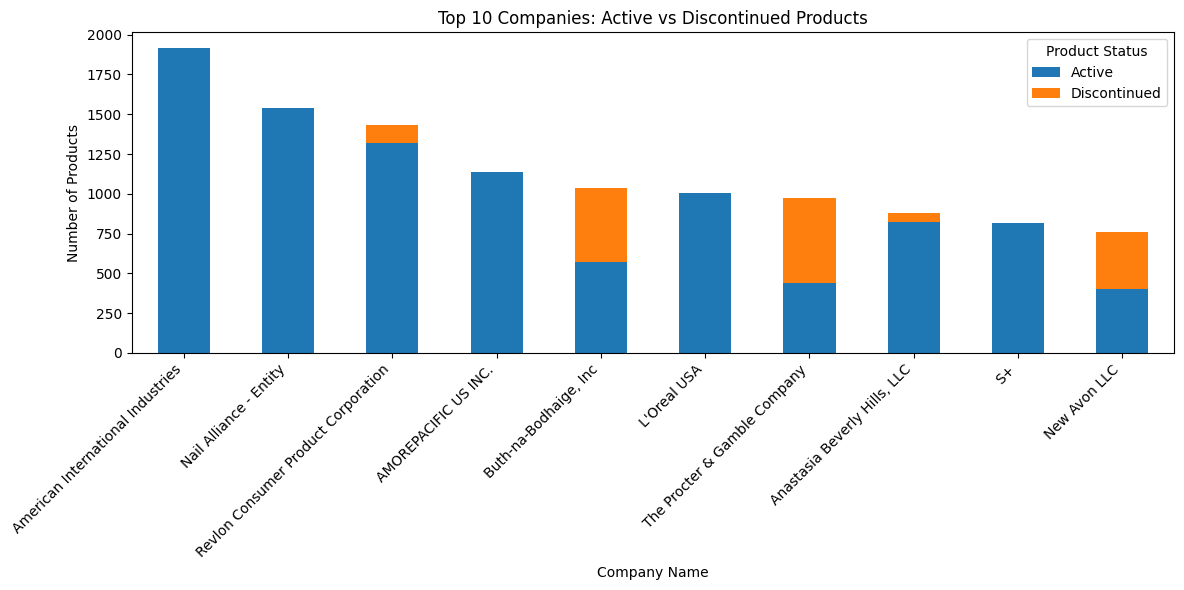

In [105]:
plt.figure(figsize=(12, 6))

plot_df_top10.plot(
    kind='bar',
    stacked=True,
    ax=plt.gca()
)

plt.title("Top 10 Companies: Active vs Discontinued Products")
plt.xlabel("Company Name")
plt.ylabel("Number of Products")
plt.legend(title="Product Status")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Top 15 Cosmetic Products with the Highest Number of chemicals 

### This visualization highlights the cosmetic products with the highest number of chemical ingredients, helping identify products with complex chemical compositions.


#### Step 1: Count chemicals per product

In [106]:
chemicals_per_product = (
    df.groupby('ProductName')['ChemicalName']
      .nunique()
)

### Bar plot (Top 15 products with most chemicals)

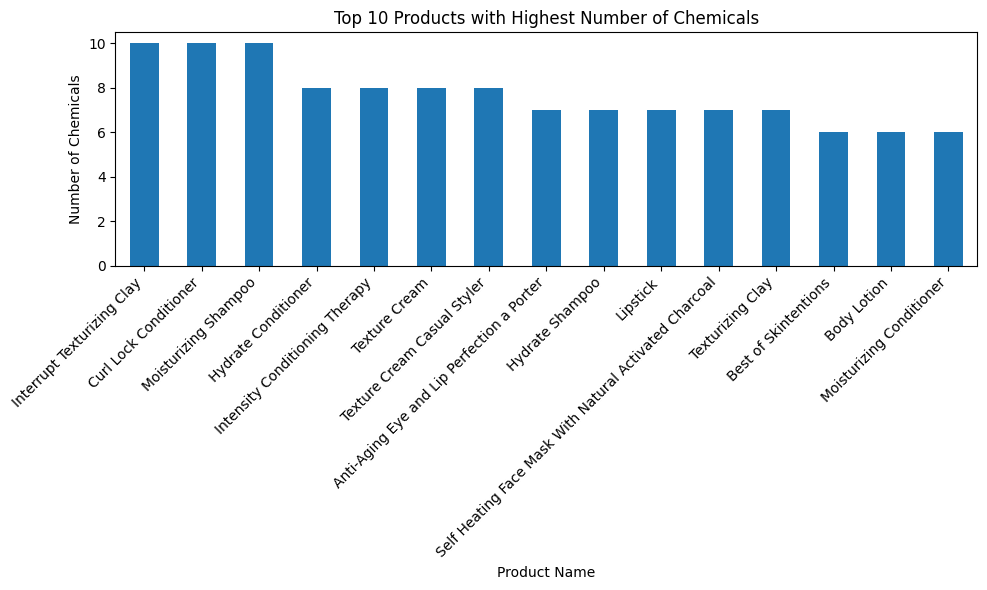

In [107]:
top_products = chemicals_per_product.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
top_products.plot(kind='bar')
plt.title("Top 10 Products with Highest Number of Chemicals")
plt.xlabel("Product Name")
plt.ylabel("Number of Chemicals")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [108]:
top_15_brands_chemicals = (
    df.groupby('BrandName')['ChemicalName']
    .nunique()                     # unique chemicals per brand
    .sort_values(ascending=False)
    .head(15)
)

top_15_brands_chemicals

BrandName
Regis Design Line    21
Palladio             15
RITUALS              13
Philosophy           13
L'BEL                12
Mastercuts           12
Nu Skin              11
La Prairie           10
Bliss                10
GUERLAIN             10
Nature's Gate        10
Not Specified         9
Costcutters           9
SEPHORA               9
Perricone MD          8
Name: ChemicalName, dtype: int64

In [109]:
top_15_brands_chemicals_total = (
    df.groupby('BrandName')['ChemicalName']
    .count()                       # all occurrences
    .sort_values(ascending=False)
    .head(15)
)

top_15_brands_chemicals_total

BrandName
SEPHORA                     3394
NYX                         3227
bareMinerals                3158
Charlotte Tilbury           2453
Revlon                      2335
NARS                        2185
Victoria's Secret Beauty    2106
tarte                       2101
Sally Hansen                1834
Sephora                     1767
No7                         1749
MAKE UP FOR EVER            1723
CoverGirl                   1711
Parfums Christian Dior      1611
Palladio                    1519
Name: ChemicalName, dtype: int64

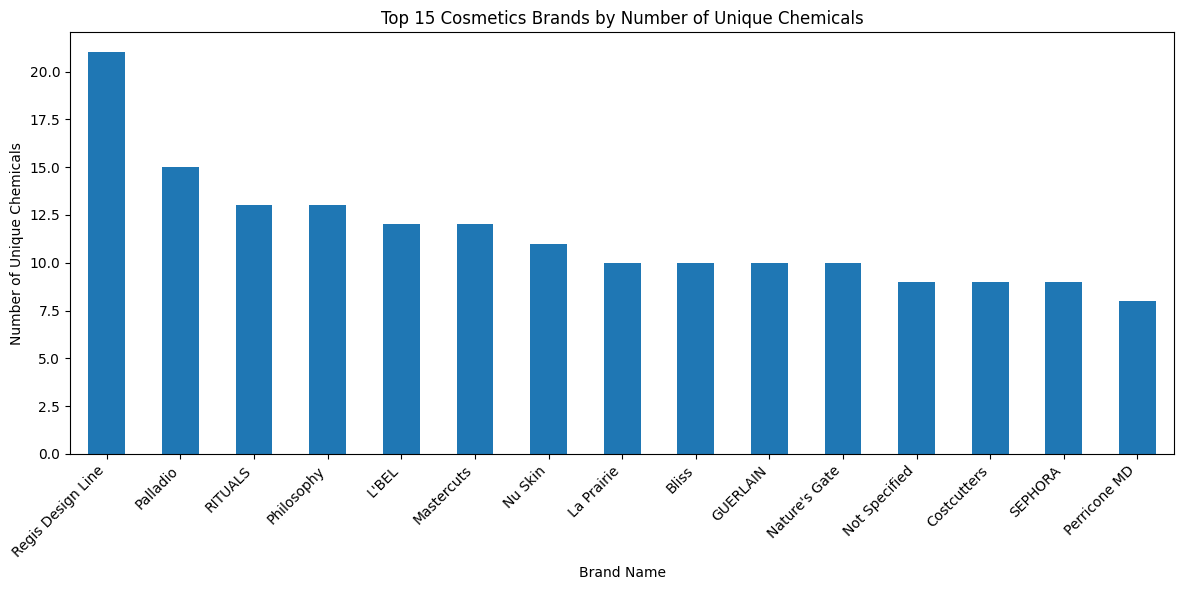

In [110]:
import matplotlib.pyplot as plt

top_15_brands_chemicals.plot(
    kind='bar',
    figsize=(12, 6),
    title='Top 15 Cosmetics Brands by Number of Unique Chemicals'
)

plt.xlabel('Brand Name')
plt.ylabel('Number of Unique Chemicals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 🔴 Risk-Based Chemical Analysis of Identified Chemicals

### 📌 Objective

#### To classify the chemicals present in the dataset based on their potential health risks and identify chemicals that may require regulatory attention or restricted usage in cosmetic products.

### 1️⃣ Risk Classification Table (Chemical vs Risk Level)

#### 📌 Step 1: Define risk categories

In [111]:
high_risk = [
    'Formaldehyde', 'Formaldehyde solution', 'Lead', 'Lead acetate',
    'Arsenic (inorganic arsenic compounds)', 'Mercury and mercury compounds',
    'Benzene', 'Benzo[a]pyrene', 'Chromium (hexavalent compounds)',
    'Cadmium and cadmium compounds', 'Coal tar', 'Coal tar solution',
    'Coal tar extract', 'N-Nitrosodimethanolamine',
    'N-Nitrosodiethanolamine', 'Styrene', 'Ethylene oxide',
    'Dichloromethane (Methylene chloride)'
]

medium_risk = [
    'Toluene', 'Retinol', 'Retinol palmitate', 'All-trans retinoic acid',
    'Cocamide diethanolamine (DEA)', 'Lauramide DEA',
    'Benzophenone', 'Benzophenone-2', 'Benzophenone-3', 'Benzophenone-4',
    'Di-n-butyl phthalate (DBP)', 'Vinyl acetate',
    'Pulegone', 'Musk xylene', 'Avobenzone'
]

### assign_risk Function
##### 1️⃣ Function Definition
##### 2️⃣ Check for High-Risk Chemicals
##### 3️⃣ Check for Medium-Risk Chemicals
##### 4️⃣ Assign Low Risk by Default
##### 🔁 Applying the Function to the Dataset

In [112]:
def assign_risk(chemical):
    if chemical in high_risk:
        return 'High Risk'
    elif chemical in medium_risk:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df['Risk_Level'] = df['ChemicalName'].apply(assign_risk)

In [113]:
df[['ChemicalName', 'Risk_Level']].drop_duplicates().head(10)

,ChemicalName,Risk_Level
0,Titanium dioxide,Low Risk
1,Distillates (coal tar),Low Risk
2,Estragole,Low Risk
31,Cocamide diethanolamine,Low Risk
45,Toluene,Medium Risk
62,Chromium (hexavalent compounds),High Risk
238,Retinol,Medium Risk
239,"Retinol/retinyl esters, when in daily dosages ...",Low Risk
307,Vitamin A,Low Risk
309,Vitamin A palmitate,Low Risk


##### How many times each chemical appears, grouped by risk.

In [114]:
# Count how many products each chemical appears in
chemical_frequency = (
    df.groupby(['CompanyName','ChemicalName', 'Risk_Level'])
      .size()
      .reset_index(name='Product_Count')
)

In [115]:
chemical_frequency

,CompanyName,ChemicalName,Risk_Level,Product_Count
0,2355644 Ontario Inc.,Titanium dioxide,Low Risk,1
1,"A. P. Deauville, LLC",Estragole,Low Risk,1
2,ACQUA DI PARMA,Cocamide MEA,Low Risk,6
3,ACQUA DI PARMA,Titanium dioxide,Low Risk,9
4,ACQUA DI PARMA,Triethanolamine,Low Risk,4
...,...,...,...,...
1590,"salerm cosm�tica profesional,Inc.",Cocamide diethanolamine,Low Risk,21
1591,"salerm cosm�tica profesional,Inc.",Phenacetin,Low Risk,17
1592,theBalm,"Retinol/retinyl esters, when in daily dosages ...",Low Risk,17
1593,theBalm,Talc,Low Risk,10


#### Risk-Level Distribution (Based on Product Count)

##### Aggregate product count by risk level

In [116]:
risk_product_counts = (
    chemical_frequency
    .groupby('Risk_Level')['Product_Count']
    .sum()
)

#### Sorted data by Product_Count

In [117]:
chemical_frequency_sorted = chemical_frequency.sort_values(by='Product_Count', ascending=False)
chemical_frequency_sorted 

,CompanyName,ChemicalName,Risk_Level,Product_Count
728,L'Oreal USA,Titanium dioxide,Low Risk,5743
1218,Revlon Consumer Product Corporation,Titanium dioxide,Low Risk,4226
1258,S+,Titanium dioxide,Low Risk,3990
344,Coty,Titanium dioxide,Low Risk,3792
153,"Bare Escentuals Beauty, Inc.",Titanium dioxide,Low Risk,3782
...,...,...,...,...
1551,"ZO Skin Health, Inc",Trichloroacetic acid,Low Risk,1
1557,"Zalan Products, Inc.",Titanium dioxide,Low Risk,1
44,"Alfalfa Nail Supply, Inc.",Acrylamide,Low Risk,1
46,"Alfalfa Nail Supply, Inc.","Silica, crystalline (airborne particles of res...",Low Risk,1


#### Convert Risk Level to numeric 
•	.map() looks at each value in Risk_Level
	•	Replaces:
	•	"Low Risk" → 1
	•	"Medium Risk" → 2
	•	"High Risk" → 3
	•	Stores result in a new column

👉 Original data stays safe.

In [118]:
risk_mapping = {
    'Low Risk': 1,
    'Medium Risk': 2,
    'High Risk': 3
}

chemical_frequency['Risk_Score'] = chemical_frequency['Risk_Level'].map(risk_mapping)

### Box Plot: Product Count by Risk Level

Text(0, 0.5, 'Number of Products')

<Figure size 800x500 with 0 Axes>

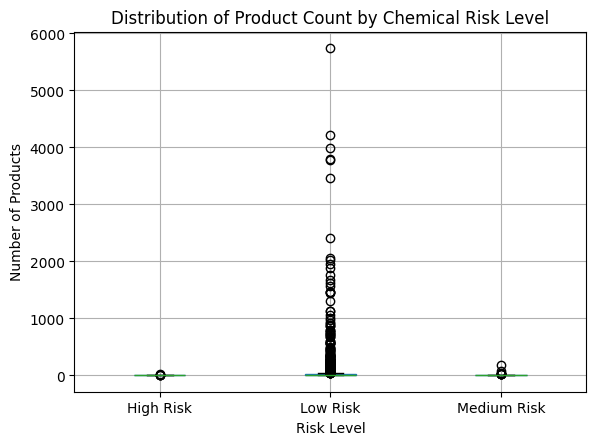

In [119]:
plt.figure(figsize=(8,5))

chemical_frequency.boxplot(
    column='Product_Count',
    by='Risk_Level',
    patch_artist=True
)

plt.title("Distribution of Product Count by Chemical Risk Level")
plt.suptitle("")
plt.xlabel("Risk Level")
plt.ylabel("Number of Products")

### What this does
	•	Converts the Y-axis to logarithmic scale
	•	Compresses very large values
	•	Allows small and large Product_Count values to be visible together

<Figure size 800x500 with 0 Axes>

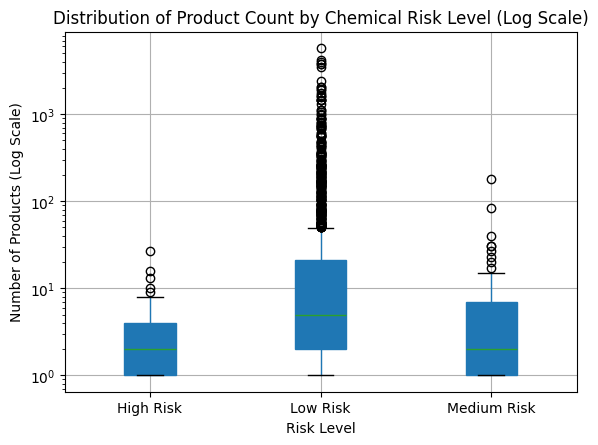

In [120]:
plt.figure(figsize=(8,5))

chemical_frequency.boxplot(
    column='Product_Count',
    by='Risk_Level',
    patch_artist=True
)

plt.yscale('log')  # 
plt.title("Distribution of Product Count by Chemical Risk Level (Log Scale)")
plt.suptitle("")
plt.xlabel("Risk Level")
plt.ylabel("Number of Products (Log Scale)")
plt.show()

### STEP 1: Filter High-Risk chemicals

In [164]:
high_risk_df = df[df['Risk_Level'] == 'High Risk']
high_risk_df

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,DiscontinuedStatus,Risk_Level
62,45,Enzymatic Sea Mud - professional only,Unknown,Unknown,43,Dermalogica,Dermalogica,6,Bath Products,166,...,Chromium (hexavalent compounds),08/24/2009,08/24/2009,Active,08/24/2009,08/24/2009,Active,1,Active,High Risk
1299,544,MediBac Clearing Masque - Part 1,Unknown,Unknown,43,Dermalogica,Dermalogica,90,Skin Care Products,91,...,Chromium (hexavalent compounds),09-08-2009,09-08-2009,Active,09-08-2009,09-08-2009,Active,1,Active,High Risk
1300,545,Sheer Tint Redness Relief SPF15,Unknown,Unknown,43,Dermalogica,Dermalogica,106,Sun-Related Products,107,...,Chromium (hexavalent compounds),09-08-2009,04/21/2014,11-10-2010,09-08-2009,09-08-2009,Active,2,Discontinued,High Risk
7243,2370,Grecian Plus Gradual Haircolor Foam,Unknown,Unknown,172,Combe Incorporated,Grecian Plus,32,Hair Coloring Products,36,...,Lead acetate,10-05-2009,10-05-2009,Active,10-05-2009,10-05-2009,Active,1,Active,High Risk
7346,2377,Grecian Formula 16 Liquid,Unknown,Unknown,172,Combe Incorporated,Grecian Formula 16,32,Hair Coloring Products,36,...,Lead acetate,10-05-2009,10-05-2009,Active,10-05-2009,10-05-2009,Active,1,Active,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113604,41217,Zetesol LA 370,Unknown,Unknown,1379,"Zschimmer & Schwarz, Inc.",Zetesol LA 370,6,Bath Products,11,...,Ethylene oxide,03-03-2020,03-03-2020,Active,03-03-2020,03-03-2020,Active,2,Active,High Risk
113606,41217,Zetesol LA 370,Unknown,Unknown,1379,"Zschimmer & Schwarz, Inc.",Zetesol LA 370,18,Hair Care Products (non-coloring),31,...,Ethylene oxide,03-03-2020,03-03-2020,Active,03-03-2020,03-03-2020,Active,2,Active,High Risk
113608,41218,Zetesol LES 2/K,Unknown,Unknown,1379,"Zschimmer & Schwarz, Inc.",Zetesol LES 2/K,6,Bath Products,11,...,Ethylene oxide,03-03-2020,03-03-2020,Active,03-03-2020,03-03-2020,Active,2,Active,High Risk
113610,41218,Zetesol LES 2/K,Unknown,Unknown,1379,"Zschimmer & Schwarz, Inc.",Zetesol LES 2/K,18,Hair Care Products (non-coloring),31,...,Ethylene oxide,03-03-2020,03-03-2020,Active,03-03-2020,03-03-2020,Active,2,Active,High Risk


### STEP 2: Get UNIQUE High-Risk Products
🔹 This answers: “Which products are high risk?”

In [165]:
high_risk_product_list = (
    high_risk_products['ProductName']
    .drop_duplicates()
)

In [166]:
high_risk_product_list.head(10)

62       Enzymatic Sea Mud - professional only
1299          MediBac Clearing Masque - Part 1
1300           Sheer Tint Redness Relief SPF15
7243       Grecian Plus Gradual Haircolor Foam
7346                 Grecian Formula 16 Liquid
7390                  Grecian Formula 16 Cream
14176      Awapuhi Moisture Mist (Non-Aerosol)
14177                          Awapuhi Shampoo
14178                   Baby Don't Cry Shampoo
14179                             Taming Spray
Name: ProductName, dtype: object

### To see total count high-risk products

In [167]:
print("Number of high-risk products:", high_risk_product_list.shape[0])

Number of high-risk products: 105


### Count how many high-risk chemicals each product has

In [168]:
high_risk_product_counts = (
    high_risk_products
    .groupby(['ProductName'])
    .size()
    .reset_index(name='High_Risk_Chemical_Count')
    .sort_values(by='High_Risk_Chemical_Count', ascending=False)
)

### 🔴 High-Risk Product Counts

The table high_risk_product_counts shows cosmetic products ranked by the number of high-risk chemicals they contain.
This helps identify products that may pose greater health and safety concerns.

In [169]:
high_risk_product_counts 

,ProductName,High_Risk_Chemical_Count
46,Hydrate Shampoo,8
45,Hydrate Conditioner,6
69,Post-Skin Resurfacing Balm Therapeutic Care,6
43,Harmon Zinc Oxide Ointment 2oz,4
65,Mood Switch,4
...,...,...
98,White Diamonds Body Radiance Silky Moisturizin...,1
100,Youthair Liquid,1
99,Youthair Creme,1
101,Zetesap C 11,1


### Step 1: Select Top High-Risk Products

In [170]:
top_high_risk = high_risk_product_counts.head(10)

### Step 2: Create Pie Chart

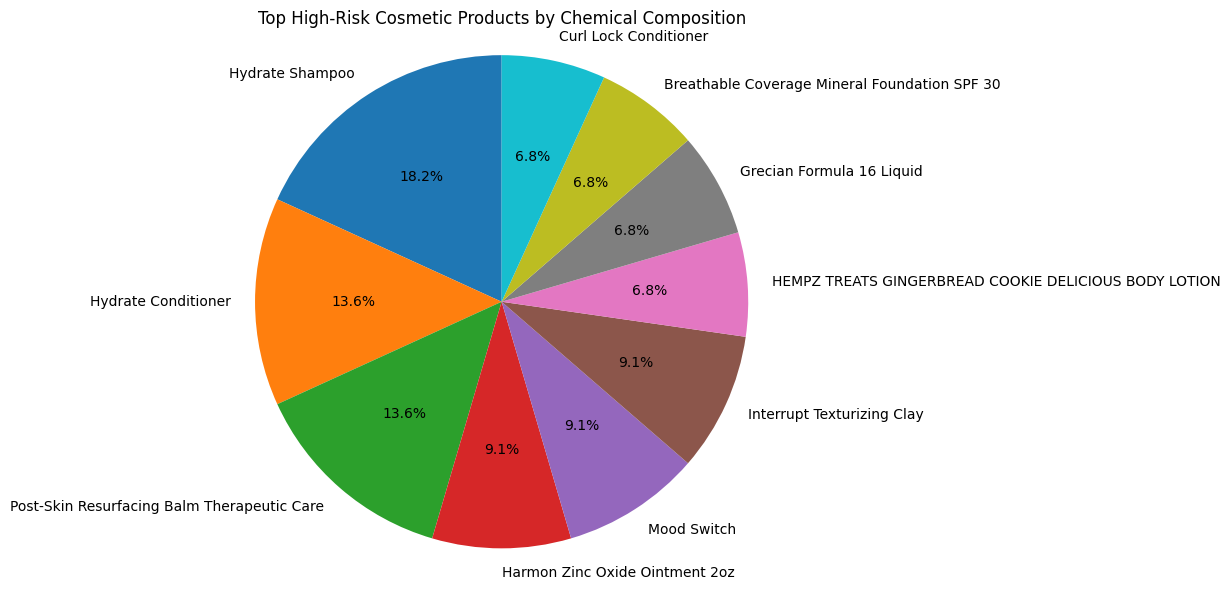

In [185]:
plt.figure(figsize=(7,7))

plt.pie(
    top_high_risk['High_Risk_Chemical_Count'],
    labels=top_high_risk['ProductName'],
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Top High-Risk Cosmetic Products by Chemical Composition")
plt.axis('equal')  # makes pie a circle
plt.show()

### Top 15 companies by Number of Products
#### Horizontal Bar chart 

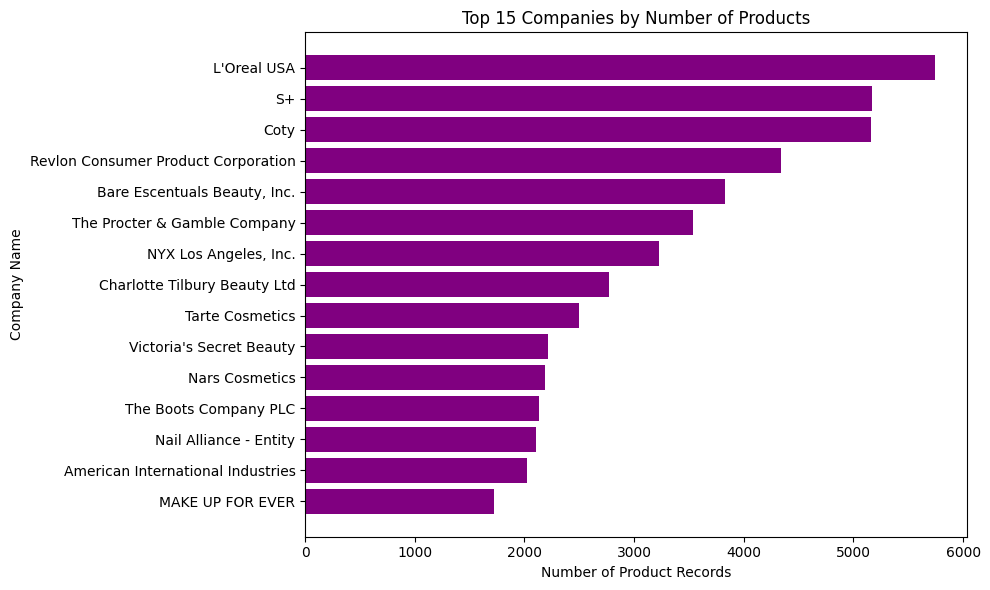

In [132]:
# Get top 15 companies
top_companies = df['CompanyName'].value_counts().head(15)

plt.figure(figsize=(10, 6))
plt.barh(top_companies.index, top_companies.values,color='purple')
plt.xlabel("Number of Product Records")
plt.ylabel("Company Name")
plt.title("Top 15 Companies by Number of Products")
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()

In [133]:
primary_subcategory_counts = (
    df.groupby(['BrandName','PrimaryCategory', 'SubCategory'])
      .size()
      .reset_index(name='Count')
)

In [134]:
primary_subcategory_counts

,BrandName,PrimaryCategory,SubCategory,Count
0,Anastasia Beverly HIlls,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils,1
1,Entity Nudite,Nail Products,Artificial Nails and Related Products,1
2,Gap Outlet,Makeup Products (non-permanent),Lip Gloss/Shine,1
3,Hard Candy,Makeup Products (non-permanent),Eye Shadow,20
4,Innisfree,Makeup Products (non-permanent),Lip Balm (making a cosmetic claim),1
...,...,...,...,...
7626,theBalm,Skin Care Products,Skin Cleansers,1
7627,theBalm,Skin Care Products,Skin Moisturizers (making a cosmetic claim),3
7628,theBalm,Sun-Related Products,Sunscreen (making a cosmetic claim),16
7629,unisource,Bath Products,Body Washes and Soaps,1


### count plot of Top Brands by Primary Category

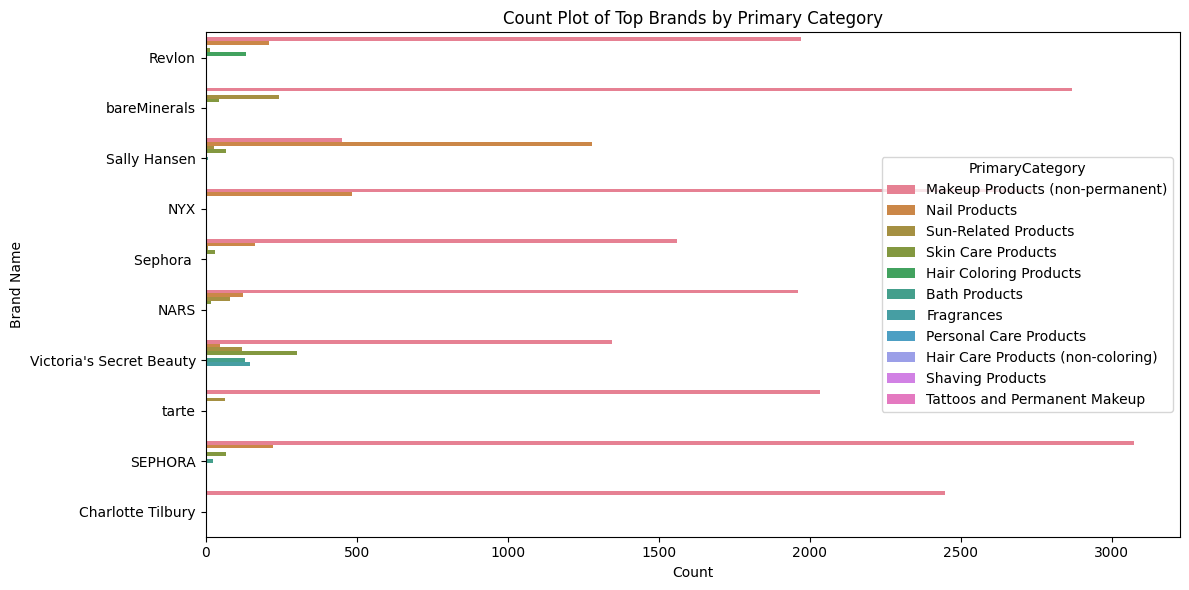

In [135]:

# Top 10 brands to keep plot readable
top_brands = df['BrandName'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df[df['BrandName'].isin(top_brands)],
    y='BrandName',
    hue='PrimaryCategory'
)

plt.xlabel("Count")
plt.ylabel("Brand Name")
plt.title("Count Plot of Top Brands by Primary Category")
plt.tight_layout()
plt.show()

#### 🎻 Violin Plot: Distribution of Product Counts by Primary Category (Top Brands)
##### This violin plot visualizes the distribution of product records across brands for each primary product category.
	•	Each violin represents a primary category
	•	The width of the violin indicates the density of brands
	•	Inner quartile lines show the spread and median
	•	Wider sections indicate categories where more brands are concentrated

In [136]:
brand_counts = (
    df.groupby(['PrimaryCategory', 'BrandName'])
      .size()
      .reset_index(name='Count')
)

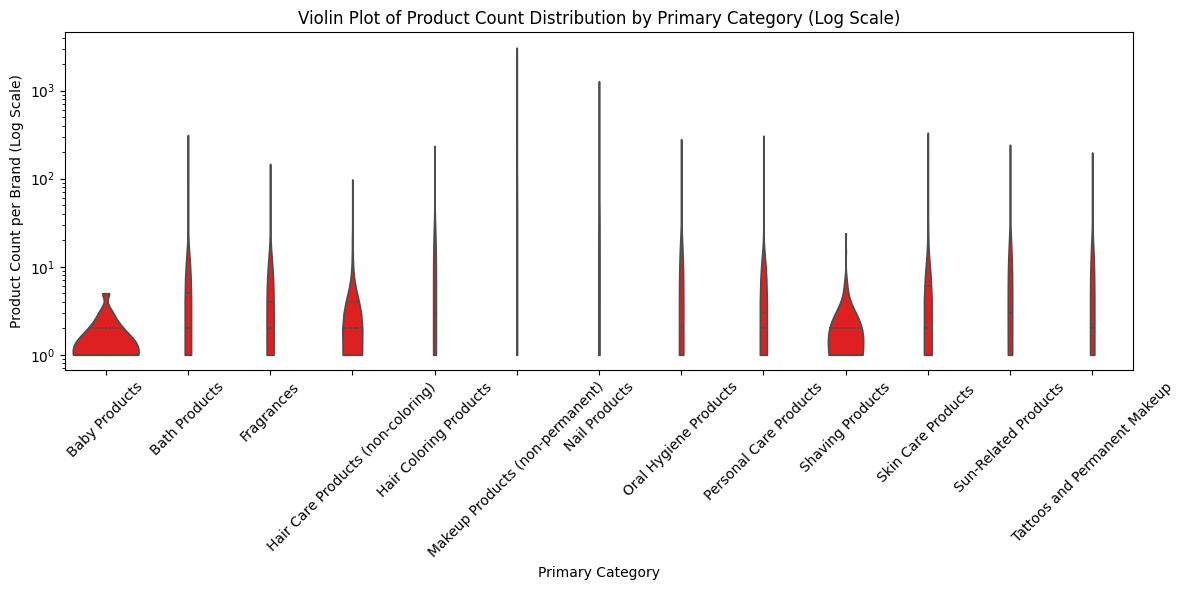

In [137]:
plt.figure(figsize=(12, 6))

sns.violinplot(
    data=brand_counts,
    x='PrimaryCategory',
    y='Count',
    color='red',
    inner='quartile',
    cut=0
)

plt.yscale('log')   # ⭐ IMPORTANT
plt.xlabel("Primary Category")
plt.ylabel("Product Count per Brand (Log Scale)")
plt.title("Violin Plot of Product Count Distribution by Primary Category (Log Scale)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Strip Plot of Product Count Distribution by Primary Category

This strip plot visualizes the distribution of product counts per brand across different primary product categories.

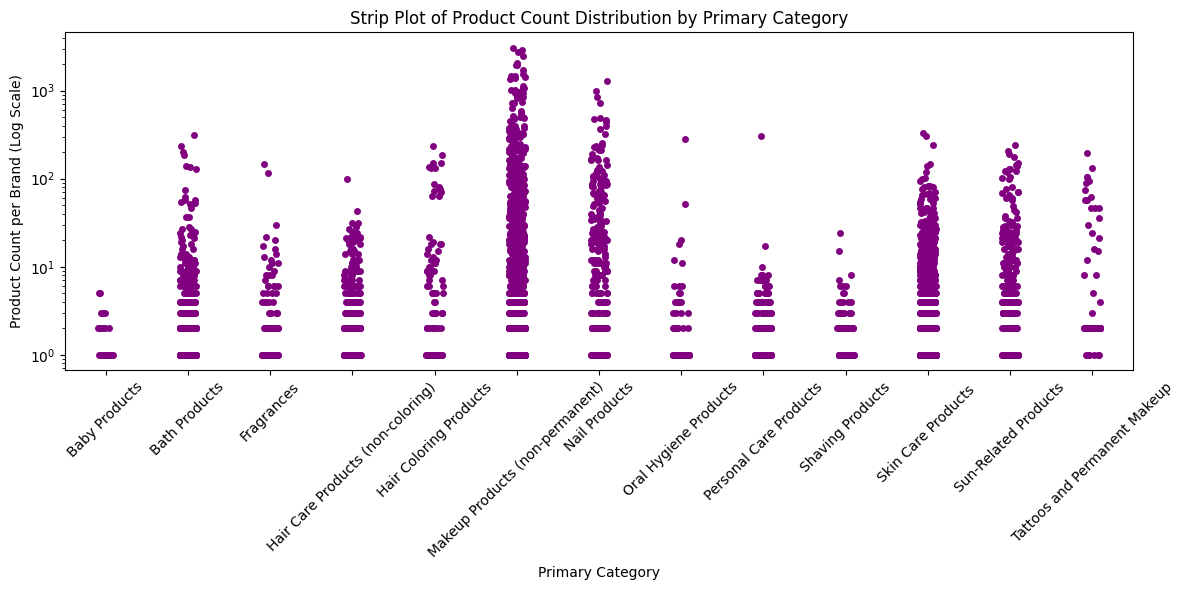

In [138]:
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=brand_counts,
    x='PrimaryCategory',
    y='Count',
    jitter=True,
    color='purple'
)

plt.yscale('log')
plt.xlabel("Primary Category")
plt.ylabel("Product Count per Brand (Log Scale)")
plt.title("Strip Plot of Product Count Distribution by Primary Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Select Top Chemicals & Top Brands

In [139]:
top_chemicals = df['ChemicalName'].value_counts().head(8).index
top_brands = df['BrandName'].value_counts().head(10).index

In [140]:
top_chemicals

Index(['Titanium dioxide',
       'Silica, crystalline (airborne particles of respirable size)',
       'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.',
       'Mica', 'Butylated hydroxyanisole', 'Carbon black', 'Talc',
       'Cocamide diethanolamine'],
      dtype='object', name='ChemicalName')

### Filter the dataset (IMPORTANT: use .copy())
##### This line filters the dataset to include only rows where the chemical and brand belong to the most frequently used ones, and creates a safe independent copy for further analysis.
###### copy() function Prevents SettingWithCopyWarning


In [141]:
filtered_df = df[
    df['ChemicalName'].isin(top_chemicals) &
    df['BrandName'].isin(top_brands)
].copy()

#### Create ascending order (low → high usage)

In [142]:
chemical_order = (
    filtered_df['ChemicalName']
    .value_counts()
    .sort_values(ascending=True)
    .index
)

brand_order = (
    filtered_df['BrandName']
    .value_counts()
    .sort_values(ascending=True)
    .index
)

#### Apply ordering safely

In [143]:
filtered_df.loc[:, 'ChemicalName'] = pd.Categorical(
    filtered_df['ChemicalName'],
    categories=chemical_order,
    ordered=True
)

filtered_df.loc[:, 'BrandName'] = pd.Categorical(
    filtered_df['BrandName'],
    categories=brand_order,
    ordered=True
)

### 📊 Brand-wise Usage of Top Chemicals

#### This count plot visualizes how frequently the most commonly used chemicals appear across top cosmetic brands.

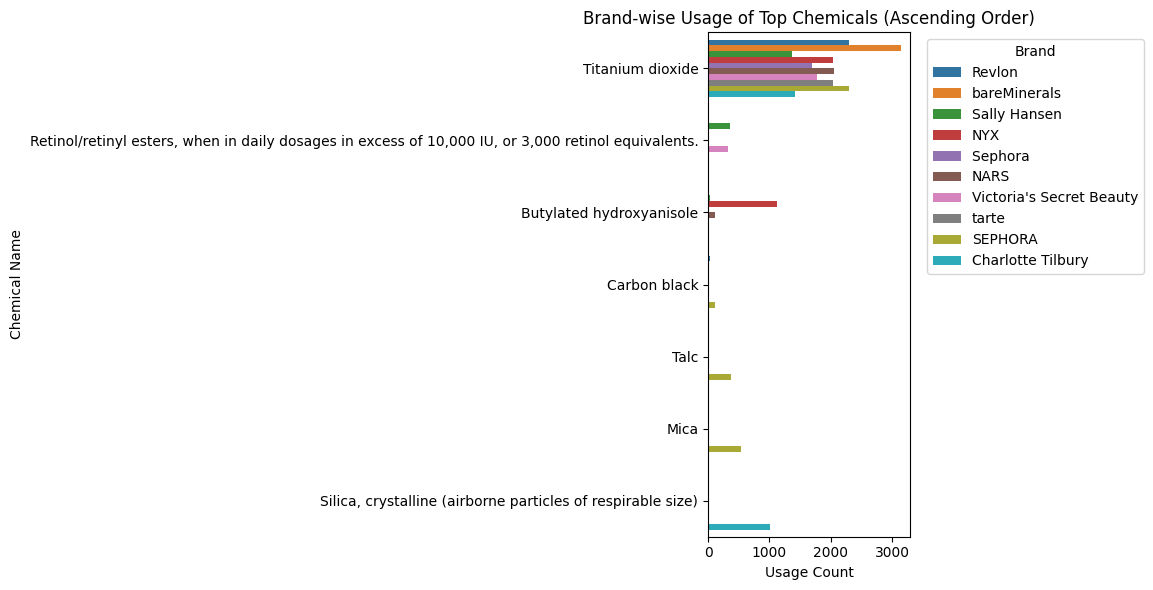

In [144]:
plt.figure(figsize=(12, 6))

sns.countplot(
    data=filtered_df,
    y='ChemicalName',
    hue='BrandName'
)

plt.xlabel("Usage Count")
plt.ylabel("Chemical Name")
plt.title("Brand-wise Usage of Top Chemicals (Ascending Order)")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [186]:
high_risk_Company_list = (
    high_risk_products['CompanyName']
    .drop_duplicates()
)

In [187]:
high_risk_Company_list.head(10)

62                      Dermalogica
7243             Combe Incorporated
14176    John Paul Mitchell Systems
15613             Regis Corporation
18002                  PBIGROUP INC
19119                 Chattem, Inc.
19139            Harmon Stores Inc.
20818         Elizabeth Arden, Inc.
26050                    Philosophy
30134               Australian Gold
Name: CompanyName, dtype: object

In [188]:
high_risk_discontinued = df[
    (df['Risk_Level'] == 'High Risk') &
    (df['DiscontinuedStatus'] == 'Discontinued')
]

In [189]:
high_risk_Company_discontinued = (
    high_risk_discontinued
    .groupby('CompanyName')['ChemicalCount']
    .sum()
    .reset_index(name='HighRiskDiscontinuedCount')
    .sort_values('HighRiskDiscontinuedCount', ascending=False)
)

In [190]:
high_risk_Company_discontinued.head(10)

,CompanyName,HighRiskDiscontinuedCount
3,Regis Corporation,167
2,"Elizabeth Arden, Inc.",14
1,Dermalogica,2
0,Combe Incorporated,1


In [191]:
high_risk_company_status = (
    high_risk_df
    .groupby(['CompanyName', 'DiscontinuedStatus'])['ChemicalCount']
    .sum()
    .reset_index()
)

In [192]:
high_risk_company_pivot = (
    high_risk_company_status
    .pivot(
        index='CompanyName',
        columns='DiscontinuedStatus',
        values='ChemicalCount'
    )
    .fillna(0)
    .reset_index()
)

In [193]:
high_risk_company_pivot = high_risk_company_pivot.sort_values(
    by='Discontinued',
    ascending=False
)

high_risk_company_pivot

DiscontinuedStatus,CompanyName,Active,Discontinued
25,Regis Corporation,83.0,167.0
10,"Elizabeth Arden, Inc.",2.0,14.0
8,Dermalogica,2.0,2.0
4,Combe Incorporated,4.0,1.0
0,"Allure Labs, Inc.",24.0,0.0
3,"Chattem, Inc.",5.0,0.0
2,Australian Gold,1.0,0.0
6,Cosmopharm Ltd.,6.0,0.0
5,"Concept Laboratories, Inc.",4.0,0.0
7,"DERMAQUEST, INC.",20.0,0.0


In [194]:
medium_risk_discontinued_company = (
    df[
        (df['Risk_Level'] == 'Medium Risk') &
        (df['DiscontinuedStatus'] == 'Discontinued')
    ]
    .groupby('CompanyName')['ChemicalCount']
    .sum()
    .reset_index(name='MediumRiskDiscontinuedCount')
    .sort_values('MediumRiskDiscontinuedCount', ascending=False)
)

In [195]:
medium_risk_discontinued_company.head(10)

,CompanyName,MediumRiskDiscontinuedCount
7,Palladio Beauty Group,60
4,"Melaleuca, Inc.",33
3,"La Prairie, Inc.",26
10,"SkinMedica, an Allergan Company",6
8,"Physician's Care Alliance, LLC",2
1,"Conopco, Inc.",2
2,"Jan Marini Skin Research, Inc.",2
0,Carma Laboratories,1
5,"NEOCUTIS, Inc",1
6,Pacific World Cosmetics,0


In [196]:
low_risk_discontinued_company = (
    df[
        (df['Risk_Level'] == 'Low Risk') &
        (df['DiscontinuedStatus'] == 'Discontinued')
    ]
    .groupby('CompanyName')['ChemicalCount']
    .sum()
    .reset_index(name='LowRiskDiscontinuedCount')
    .sort_values('LowRiskDiscontinuedCount', ascending=False)
)

In [197]:
low_risk_discontinued_company.head(10)

,CompanyName,LowRiskDiscontinuedCount
161,The Procter & Gamble Company,2947
91,MAESA LLC,1839
173,Victoria's Secret Beauty,1630
49,"Elizabeth Arden, Inc.",888
15,Bath & Body Works,747
56,GUERLAIN,745
158,The Boots Company PLC,597
164,Too Faced Cosmetics,560
24,"Buth-na-Bodhaige, Inc",531
41,Cover FX Skin Care Inc.,431


In [198]:
total_product_count = (
    df
    .groupby('CompanyName')['ChemicalCount']
    .sum()
    .reset_index(name='TotalProductCount')
)

In [199]:
discontinued_product_count = (
    df[df['DiscontinuedStatus'] == 'Discontinued']
    .groupby('CompanyName')['ChemicalCount']
    .sum()
    .reset_index(name='DiscontinuedProductCount')
)

In [200]:
company_product_summary = (
    total_product_count
    .merge(discontinued_product_count, on='CompanyName', how='left')
    .fillna(0)
    .sort_values('DiscontinuedProductCount', ascending=False)
)

In [201]:
company_product_summary

,CompanyName,TotalProductCount,DiscontinuedProductCount
527,The Procter & Gamble Company,3629,2947.0
317,MAESA LLC,2508,1839.0
563,Victoria's Secret Beauty,2685,1630.0
165,"Elizabeth Arden, Inc.",1355,902.0
56,Bath & Body Works,1508,747.0
...,...,...,...
29,Amway Corporation,2,0.0
590,"Zalan Products, Inc.",1,0.0
572,"Watkins, Inc",5,0.0
573,We are Luxe Ltd.,4,0.0


In [202]:
primary_category_discontinued = (
    df[df['DiscontinuedStatus'] == 'Discontinued']
    .groupby('PrimaryCategory')['ChemicalCount']
    .sum()
    .reset_index(name='DiscontinuedProductCount')
    .sort_values('DiscontinuedProductCount', ascending=False)
)

In [203]:
primary_category_discontinued

,PrimaryCategory,DiscontinuedProductCount
5,Makeup Products (non-permanent),10726
10,Skin Care Products,1331
6,Nail Products,1232
11,Sun-Related Products,1031
3,Hair Care Products (non-coloring),709
1,Bath Products,595
4,Hair Coloring Products,439
8,Personal Care Products,320
2,Fragrances,141
9,Shaving Products,32


## Overall Summary of Findings 
###   This project presents a detailed analysis of cosmetic products by integrating chemical risk levels, product discontinuation status, primary categories, and company-wise distributions. By aggregating large-scale product and chemical data, the study uncovers clear patterns in how risk and formulation complexity influence product lifecycle decisions.

#### The category-wise discontinued analysis shows that Makeup Products (non-permanent) account for the highest number of discontinued items by a very large margin. This indicates that high-volume categories experience frequent reformulation, regulatory pressure, or market-driven discontinuation. Categories such as Skin Care, Nail Products, and Sun-Related Products also show notable discontinuation counts, while niche categories like Baby Products and Tattoos & Permanent Makeup have minimal discontinuations.

#### From the company-level analysis, large manufacturers such as The Procter & Gamble Company, MAESA LLC, and Victoria’s Secret Beauty show the highest discontinued product counts. This is largely due to their extensive product portfolios, confirming that companies with higher product volume face greater exposure to discontinuation risks.

####The risk-based analysis reveals an important insight:
	•	Low-risk products contribute the majority of discontinued counts, suggesting that discontinuation is often driven by business strategy, product updates, or market changes, not just chemical danger.
	•	Medium-risk discontinued products are relatively limited and concentrated among a small number of companies.
	•	High-risk discontinued products are rare but highly concentrated, with very few companies (such as Regis Corporation) accounting for most high-risk removals, indicating targeted regulatory or safety-driven action.

#### Overall, the findings demonstrate that product discontinuation in the cosmetics industry is influenced more by scale, category dominance, and formulation strategy than by chemical risk alone. However, when high-risk chemicals are involved, discontinuation appears decisive and company-specific.

#### This project highlights the importance of risk-based classification, aggregation analysis, and company-level monitoring in understanding cosmetic safety trends. The insights can support regulatory compliance, safer formulation practices, and strategic decision-making, while also showcasing the effectiveness of data analytics in real-world product safety evaluation.

 ####   The analysis used grouping, aggregation, reshaping, and visualization techniques to derive product-level insights and compare active versus discontinued products across brands, subcategories, and risk levels.
	•	Product-level aggregation showed that the majority of products are active, with a smaller but meaningful proportion classified as discontinued, varying across subcategories.
	•	Certain subcategories contain a high concentration of active products, indicating stable demand and formulation consistency, while others exhibit higher discontinuation rates, suggesting regulatory, reformulation, or market-driven changes.
	•	Analysis of chemical risk levels revealed a highly skewed usage pattern:
	•	Low-risk chemicals are widely used and appear in a large number of products.
	•	High-risk chemicals are present in relatively few products, reflecting stricter regulatory controls.
	•	Medium-risk chemicals show moderate and variable usage.
	•	A small number of low-risk chemicals act as outliers, appearing in an exceptionally high number of products and significantly influencing overall distributions.
	•	Brand-wise analysis showed that product availability is concentrated among a limited number of dominant brands, while many brands contribute only a small number of products.
	•	Within top brands, product portfolios are unevenly distributed across primary categories, indicating strategic specialization rather than uniform diversification.
	•	Subcategory-level analysis highlighted significant differences in the balance between active and discontinued products, reflecting differences in product lifecycle, ingredient risk, and compliance complexity.
	•	Overall, the findings indicate that product longevity and usage patterns are shaped by a combination of chemical risk level, subcategory characteristics, and brand strategy.